# 수치 미분

In [1]:
import numpy as np

### 1차원 함수의 수치 미분

In [2]:
def f(x):
    return x ** 2

def analytical_d(x):
    return 2 * x

def num_d_forward(f, x, h=1e-5):    # 전진차분법
    return (f(x + h) - f(x)) / h


def num_d_backward(f, x, h=1e-5):   # 후진차분법
    return (f(x) - f(x - h)) / h


def num_d_central(f, x, h=1e-5):    # 중앙차분법 (세 기법중 가장 정확함)
    return (f(x + h) - f(x - h)) / (2 * h)

x = 3

print(analytical_d(x))
print(num_d_forward(f, x))
print(num_d_backward(f, x))
print(num_d_central(f, x))

6
6.000009999951316
5.999990000127297
6.000000000039306


### 다변수 함수의 수치 미분

In [3]:
# 편미분
def f(x, y):
    return x **2 + y **2

def partial_d(f, x, y, var='x', h=1e-5):
    if var == 'x':
        return (f(x + h, y) - f(x - h, y))  / (2 * h)
    else:
        return (f(x, y + h) - f(x, y - h))  / (2 * h)

In [5]:

print(partial_d(f, 3.0, 2.0, var='x'))
print(partial_d(f, 3.0, 2.0, var='y'))

6.000000000039306
4.000000000026205


In [6]:
def f_multi(x):
    return np.sum(x ** 2)

def analytical_gradient(x):
    return 2 * x

def num_d_gradient(f, x, h=1e-5):
    grad = np.zeros_like(x)
    for idx in range(len(x)):
        tmp = x[idx]
        x[idx] = tmp + h
        f_plus = f(x)
        x[idx] = tmp - h
        f_minus = f(x)
        grad[idx] = (f_plus - f_minus) / (2 * h)
        x[idx] = tmp
    return grad

x = np.array([1.0, 2.0, 3.0])
print(analytical_gradient(x))
print(num_d_gradient(f_multi, x))

[2. 4. 6.]
[2. 4. 6.]


### 간단한 신경망의 기울기

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_pass(x, params):
    W1, b1, W2, b2 = params
    z1 = np.dot(x, W1) + b1
    r1 = sigmoid(z1)
    z2 = np.dot(r1, W2) + b2
    r2 = sigmoid(z2)
    return r2 

def loss(r2, y):
    return 0.5 * np.sum((r2 - y) ** 2)

def get_loss(params, x, y):
    r2 = forward_pass(x, params)
    return loss(r2, y)

def num_d_gradient_params(f, params, x, y, h=1e-5):
    grads = []

    for param in params:
        grad = np.zeros_like(param)
        iter = np.nditer(param, flags=['multi_index'], op_flags=['readwrite'])  # nditer: 파라미터들을 반복해주는 역할을 해줌 / flags = ['multi_index'] 순서대로 가져올 수 있게 / op_flags=['readwrite'] : 읽고 쓸 수 있게 해줬다

        while not iter.finished:    # 끝날때까지 반복하라는 의미
            idx = iter.multi_index
            origin_val = param[idx]
            param[idx] = origin_val + h
            f_plus = f(params, x, y)
            param[idx] = origin_val - h
            f_minus = f(params, x, y)
            grad[idx] = (f_plus - f_minus) / (2 * h)
            param[idx] = origin_val
            iter.iternext()     # 다음 요소를 꺼내옴 -> 마지막 요소가 끝나면 inter.finished가 True가 된다. -> while not True -> False가 되어 while문 종료(iteration 종료)
        grads.append(grad)
    return grads

np.random.seed(0)
input_size = 2  # 뉴런 수
hidden_size = 3
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.random.randn(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.random.randn(output_size)
params = [W1, b1, W2, b2]

x = np.array([0.5, -0.2])
y = np.array([1.0])

num_grads = num_d_gradient_params(get_loss, params, x, y)

for i, grad in enumerate(num_grads):
    print(f'{i}번째 파라미터 수치 미분 기울기: \n{grad}')

0번째 파라미터 수치 미분 기울기: 
[[-3.59076788e-04 -1.91454872e-04 -1.82558270e-03]
 [ 1.43630717e-04  7.65819482e-05  7.30233079e-04]]
1번째 파라미터 수치 미분 기울기: 
[-0.00071815 -0.00038291 -0.00365117]
2번째 파라미터 수치 미분 기울기: 
[[-0.00872872]
 [-0.00457938]
 [-0.00700196]]
3번째 파라미터 수치 미분 기울기: 
[-0.01091606]


### h 값에 따른 영향

In [18]:
def f(x):
    return x ** 2

def analytical_d(x):
    return 2 * x

def num_d_central(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

x = 3.0
np.logspace(-10, -1, 50)
h_values = np.logspace(-10, -1, 50)
errors = []

true_d = analytical_d(x)
for h in h_values:
    num_d = num_d_central(f, x, h)
    error = np.abs(num_d - true_d)
    errors.append(error)

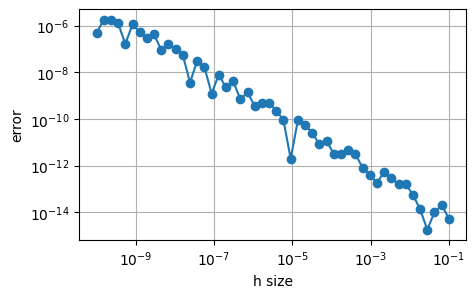

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.loglog(h_values, errors, marker='o')
plt.xlabel('h size')
plt.ylabel('error')
plt.grid(True)
plt.show()

### 자동 미분

In [ ]:
import torch

x = torch.tensor(3.0, requires_grad=True)
y = f(x)
y.backward()    # 역전파 (여기서는 그냥 미분한 것)

print(analytical_d(3.0))
print(x.grad)

6.0
tensor(6.)
